# Customer Data Analysis Project
### Project for analysing and visualizing customer data
Data from: https://github.com/datablist/sample-csv-files

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [14]:
file_path = "data/customers.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset

In [22]:
display(df.head())
display(df.info())

def clean_data(df):
    """Clean and preprocess the dataset."""
    df = df.drop(columns=["Index"])  # Drop the index column if it's redundant
    df = df.drop_duplicates()  # Remove duplicate rows
    df = df.dropna(subset=["Customer Id", "Email"])  # Remove rows without essential data
    df["Subscription Date"] = pd.to_datetime(df["Subscription Date"], errors='coerce')

    # Convert Customer Id to string
    df["Customer Id"] = df["Customer Id"].astype(str)

    # Fill missing values
    df.fillna("Unknown", inplace=True)

    return df

df = clean_data(df)

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,Month,Year
0,EB54EF1154C3A78,Heather,Callahan,Mosley-David,Lake Jeffborough,Norway,043-797-5229,915.112.1727,urangel@espinoza-francis.net,2020-08-26,http://www.escobar.org/,August,2020
1,10dAcafEBbA5FcA,Kristina,Ferrell,"Horn, Shepard and Watson",Aaronville,Andorra,932-062-1802,(209)172-7124x3651,xreese@hall-donovan.com,2020-04-27,https://tyler-pugh.info/,April,2020
2,67DAB15Ebe4BE4a,Briana,Andersen,Irwin-Oneal,East Jordan,Nepal,8352752061,(567)135-1918,haleybraun@blevins-sexton.com,2022-03-22,https://www.mack-bell.net/,March,2022
3,6d350C5E5eDB4EE,Patty,Ponce,Richardson Group,East Kristintown,Northern Mariana Islands,302.398.3833,196-189-7767x770,hohailey@anthony.com,2020-07-02,https://delacruz-freeman.org/,July,2020
4,5820deAdCF23EFe,Kathleen,Mccormick,Carson-Burch,Andresmouth,Macao,001-184-153-9683x1497,552.051.2979x342,alvaradojesse@rangel-shields.com,2021-01-17,https://welch.info/,January,2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer Id        10000 non-null  object        
 1   First Name         10000 non-null  object        
 2   Last Name          10000 non-null  object        
 3   Company            10000 non-null  object        
 4   City               10000 non-null  object        
 5   Country            10000 non-null  object        
 6   Phone 1            10000 non-null  object        
 7   Phone 2            10000 non-null  object        
 8   Email              10000 non-null  object        
 9   Subscription Date  10000 non-null  datetime64[ns]
 10  Website            10000 non-null  object        
 11  Month              10000 non-null  object        
 12  Year               10000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(11)
memory usage: 976.7

None

KeyError: "['Index'] not found in axis"

# Statistical summary

In [16]:
display(df.describe(include='all'))

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,690,1000,9215,8910,243,10000,10000,10000,NaN,8315
top,2e9d1d7eEeeE705,Julie,Dunlap,Lucero Ltd,Port Marilyn,Korea,(978)364-6347x42361,(793)868-2981x26244,barbara02@frey.com,NaN,http://www.cordova.com/
freq,1,25,23,4,4,84,1,1,1,NaN,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-14 17:30:37.440000,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-08 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-11 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-21 00:00:00,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-29 00:00:00,NaN



# Exploratory Data Analysis (EDA)

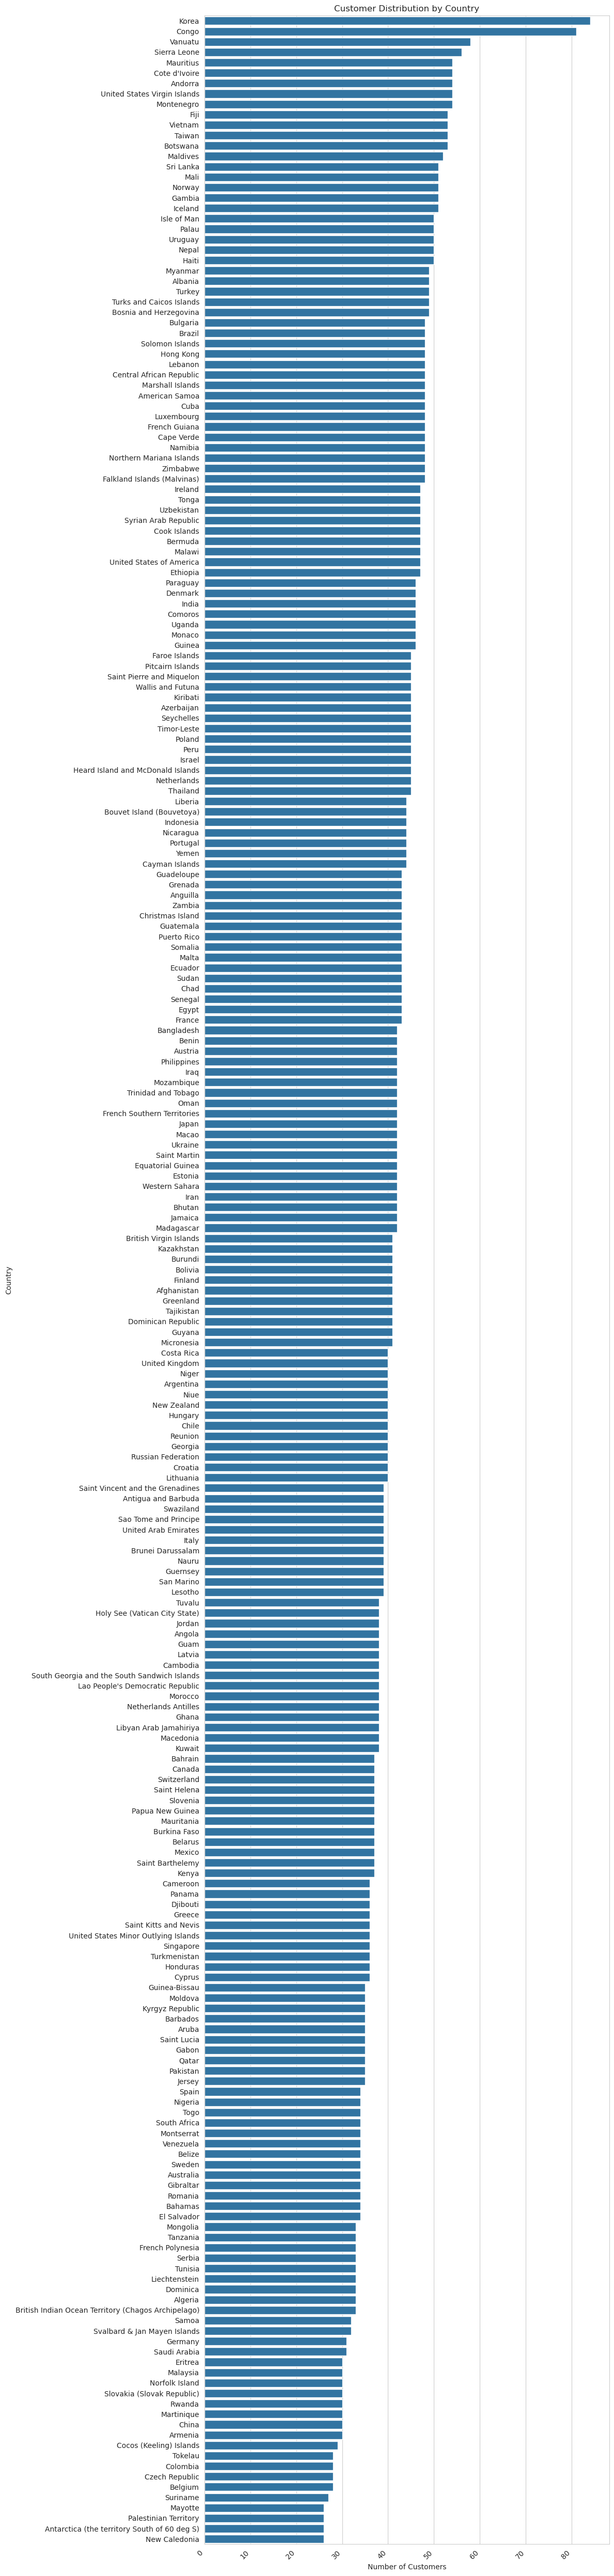

In [28]:
plt.figure(figsize=(12, 50))  # Increase size
sns.countplot(y=df['Country'], order=df['Country'].value_counts().index)
plt.title("Customer Distribution by Country")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.tight_layout()  # Adjust layout
plt.show()

# Pie Chart of the Top 10 customer distribution Countries

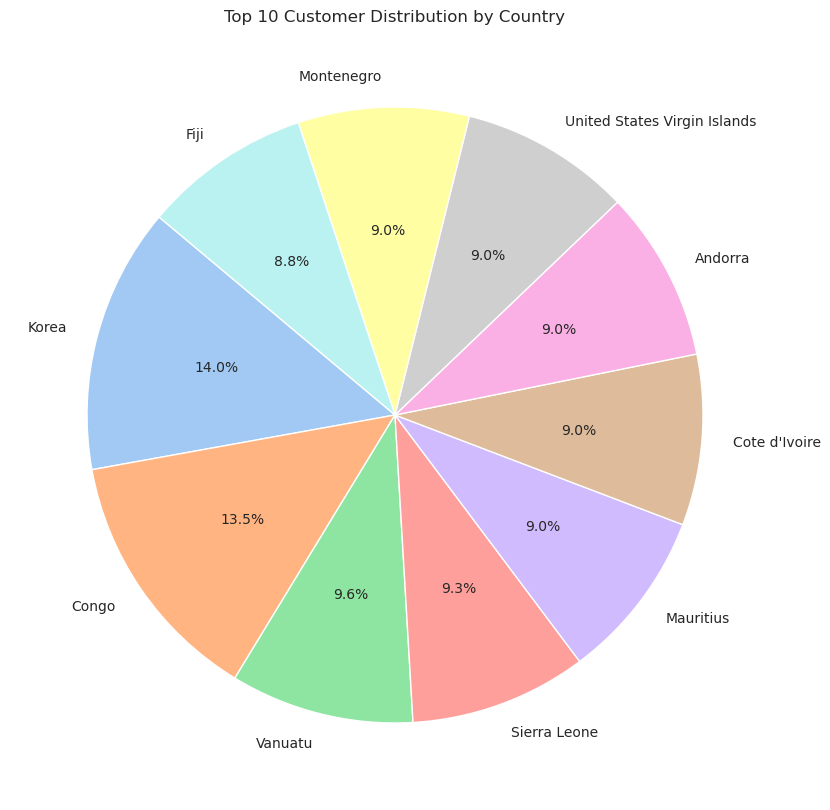

In [29]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(country_counts[:10], labels=country_counts.index[:10], autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Top 10 Customer Distribution by Country")
plt.show()

# Subscription Date Analysis

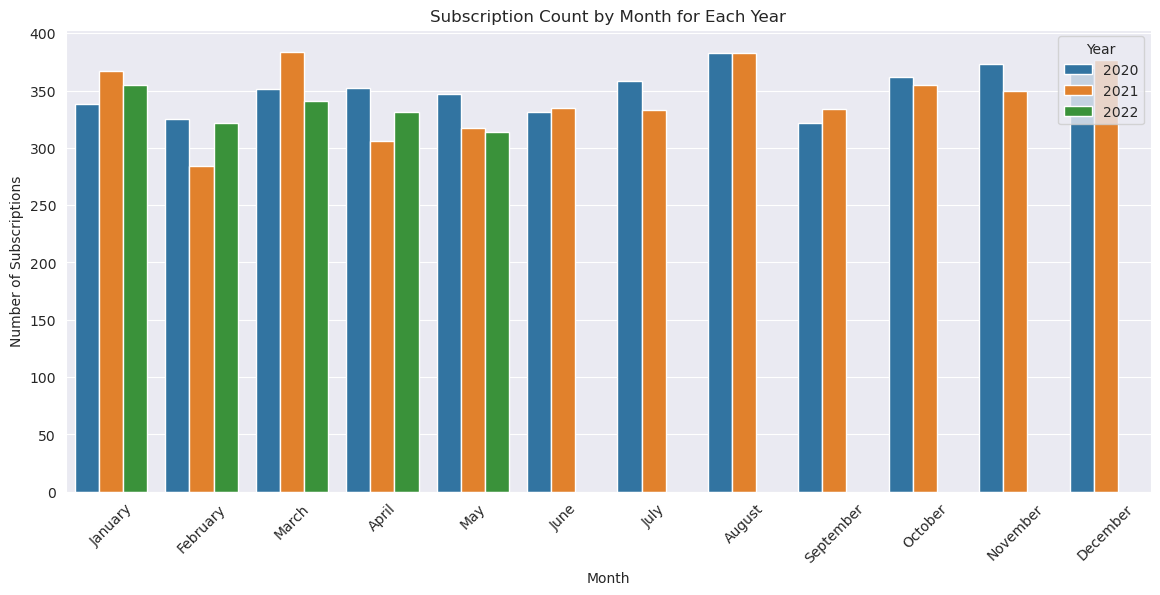

In [20]:
df['Year'] = df['Subscription Date'].dt.year
df['Month'] = df['Subscription Date'].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(14, 6))
sns.countplot(x=df['Month'], hue=df['Year'], order=month_order, palette="tab10")
plt.title("Subscription Count by Month for Each Year")
plt.xlabel("Month")
plt.ylabel("Number of Subscriptions")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()

# Save cleaned data

In [19]:
df.to_csv("data/cleaned_customers.csv", index=False)